Resolution vs Ei


In [3]:
cd ~/dv/sns-chops/resolution/CNCS/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS


In [4]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt
from mcni.utils import conversion as C

In [5]:
%matplotlib notebook

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

# Exp data

In [7]:
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [8]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop/Vdata2018.pyc'>

In [9]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


In [10]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

## Create one data file that includes all three conditions

In [22]:
ls {Vdata2018.datadir}/*.dat

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighFlux.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E1000bins.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E500bins.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_Intermediate.dat


In [25]:
%%bash
cd /SNS/users/lj7/dv/sns-chops/resolution/CNCS/
cat V_Cali_Int_Res_HighFlux.dat V_Cali_Int_Res_HighRes.dat V_Cali_Int_Res_Intermediate.dat > V_Cali_Int_Res_All.dat

In [27]:
# cat {Vdata2018.datadir}/V_Cali_Int_Res_All.dat

In [28]:
ls {Vdata2018.datadir}/*.dat

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_All.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighFlux.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E1000bins.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E500bins.dat
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_Intermediate.dat


** manually remove comment lines **

In [30]:
expdata_all = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_All.dat'))

reading data. please wait...
  done


# PyChop

In [9]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [10]:
from PyChop import PyChop2

In [11]:
import PyChop

In [12]:
instrument = PyChop2('PyChop/cncs.yaml')

In [13]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


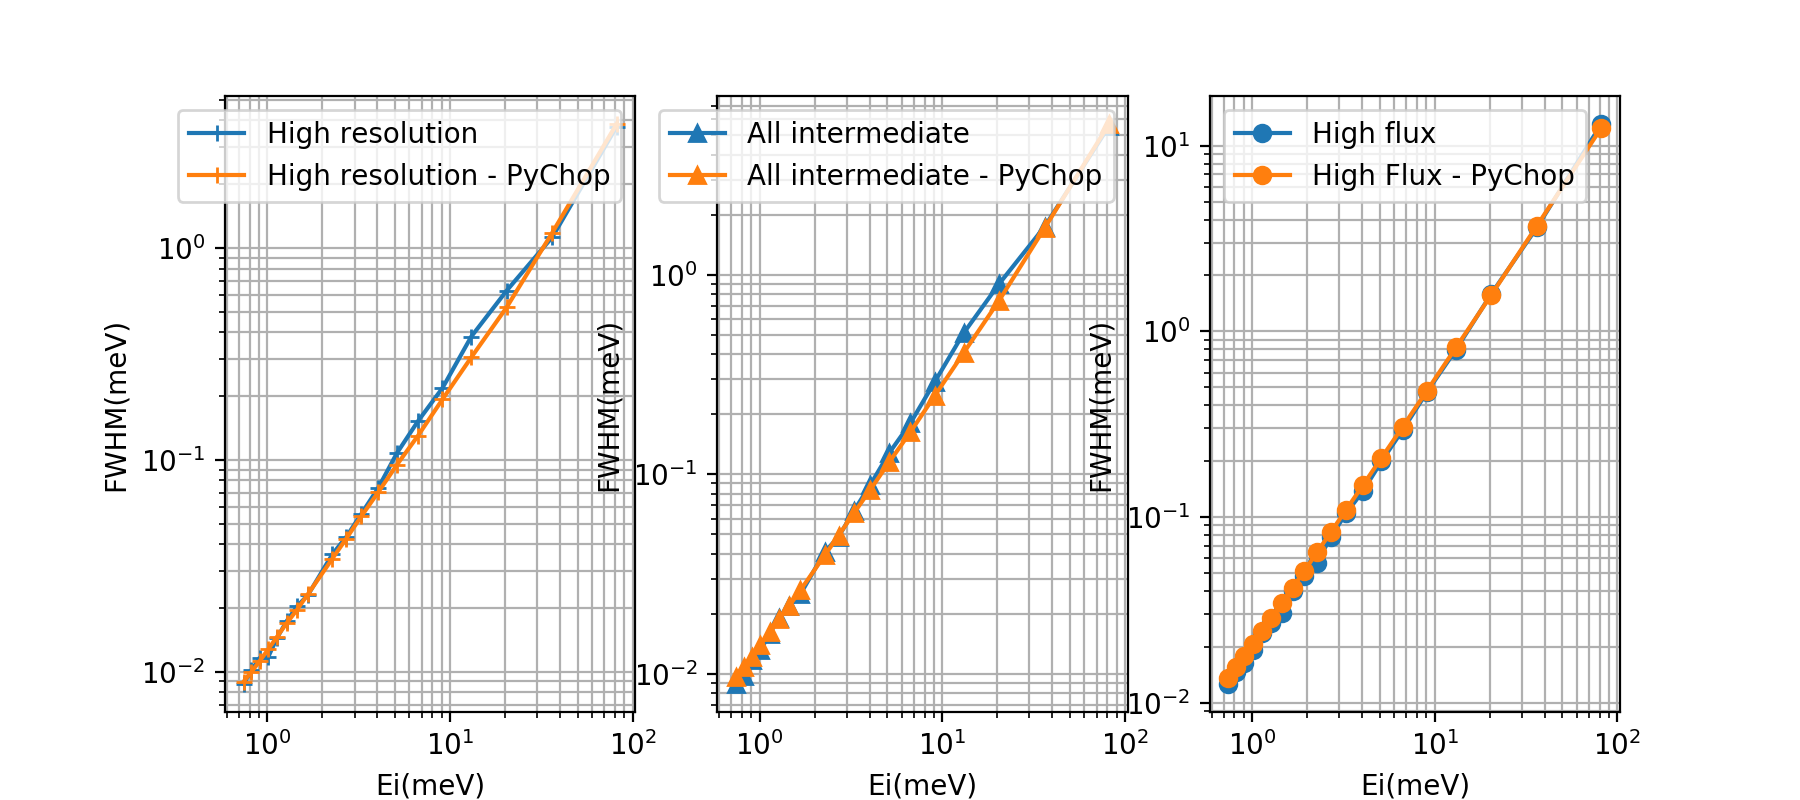

In [14]:
def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 3, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
ax[0].loglog(x,y, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax[0].loglog(x,y_pychop, '+-', label='High resolution - PyChop')
decorate(ax[0])

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax[1].loglog(x,y, '^-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=240.)[0][0] for _ in x]
ax[1].loglog(x,y_pychop, '^-', label='All intermediate - PyChop')
decorate(ax[1])

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax[2].loglog(x,y, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax[2].loglog(x,y_pychop, 'o-', label='High Flux - PyChop')
decorate(ax[2])


# plotly

In [11]:
import plotly, plotly.plotly as py, plotly.figure_factory as ff, plotly.graph_objs as go

In [31]:
expdata_all.vdata

,#,RunNumber,Energy,Ei,Chopper1,Chopper2,Chopper3,Chopper41,Chopper42,Height,FWHM,Sigma,Q
0,0.0,274470.0,81.745120,81.745120,60.0,60.0,60.0,300.0,300.0,0.003599,13.079219,5.553809,4.409917
1,0.0,274471.0,36.331164,36.331164,60.0,60.0,60.0,300.0,300.0,0.038517,3.633116,1.542725,2.939944
2,0.0,274472.0,20.436280,20.436280,60.0,60.0,60.0,300.0,300.0,0.284195,1.594030,0.676870,2.373677
3,0.0,274473.0,13.079219,13.079219,60.0,60.0,60.0,300.0,300.0,1.216110,0.797832,0.338782,1.898942
4,0.0,274474.0,9.082791,9.082791,60.0,60.0,60.0,300.0,300.0,2.039298,0.472305,0.200554,1.582451
5,0.0,274475.0,6.673071,6.673071,60.0,60.0,60.0,300.0,300.0,2.150287,0.293615,0.124677,1.356387
6,0.0,274476.0,5.109070,5.109070,60.0,60.0,60.0,300.0,300.0,1.919698,0.199254,0.084609,1.186839
7,0.0,274477.0,4.036796,4.036796,60.0,60.0,60.0,300.0,300.0,6.566879,0.137251,0.058281,1.054968
8,0.0,274478.0,3.269805,3.269805,60.0,60.0,60.0,300.0,300.0,8.378972,0.104634,0.044430,0.949471
9,0.0,274479.0,2.702318,2.702318,60.0,60.0,60.0,300.0,300.0,8.314016,0.078367,0.033277,0.863155


In [13]:
import collections

In [32]:
chopper_freqs = {
    'High Resolution': 180.,
    'Intermediate': 240.,
    'High Flux': 300.,
}

In [33]:
unique_nominal_Eis = set( list(expdata_all.Ei_list) )
unique_nominal_Eis = sorted(list(unique_nominal_Eis))

In [34]:
unique_nominal_Eis

[0.7414523356009999,
 0.8174512,
 0.905763102493,
 1.00919901235,
 1.13142034602,
 1.2772675,
 1.45324657778,
 1.6682677551,
 1.93479573964,
 2.27069777778,
 2.70231801653,
 3.2698048,
 4.03679604938,
 5.10907,
 6.673071020409999,
 9.08279111111,
 13.0792192,
 20.43628,
 36.3311644444,
 81.74512]

In [42]:
Ei_start = unique_nominal_Eis[10]

In [49]:
Eis = list(unique_nominal_Eis)

In [59]:
title='CNCS flux (intensity) vs resolution \nuse dropdown list from left to choose incident energy'
data =[]
buttons = []
all_hidden = [False] * len(Eis) * 3 # 3 modes
extra_info = dict(
    Chopper41 = ('Double disc chopper freq', '%sHz'),
#    FWHM_percentages = ('Resolution percentage', '%.1f%%'),
    RunNumber = ('Run no.', '%d'),
)
# max_res_percentage = 15.
plot_opts = dict(extra_info=extra_info) #, max_res_percentage=max_res_percentage)

for i, n_Ei in enumerate(Eis):
    for mode_name, ddch_freq in chopper_freqs.items():
        condition = (expdata_all.vdata.Chopper41==ddch_freq)*(expdata_all.vdata.Energy==n_Ei)
        # condition *= (expdata_all.intensity>min_flux))
        plot = expdata_all.createPlotXY_on_condition(
            condition, 'FWHM', 'intensity', **plot_opts)
        plot.visible = False
        plot.name = mode_name
        data.append(plot)
    #
    visible = list(all_hidden)
    visible[3*i] = True; visible[3*i+1] = True; visible[3*i+2] = True
    #
    button =  dict(
        label = '%smeV' % n_Ei,
        method = 'update',
        args = [{'visible': visible},
                {'title': 'Ei=%smeV %s' % (n_Ei, title),
                }])
    buttons.append(button)
    continue

updatemenus = list([
    dict(active=-1,
         buttons=list(buttons)
        )
])

atEi = np.where(np.isclose(Eis, Ei_start))[0][0]
data[atEi*3].visible = data[atEi*3+1].visible = data[atEi*3+2].visible = True

layout = dict(
    title=title, 
    # showlegend=False, 
    updatemenus=updatemenus,
    xaxis=dict(
        title='FWHM (meV)',
        showspikes=True,
    ),
    yaxis=dict(
        title='Flux (arb. unit)',
        showspikes=True,
    ),
    hovermode="closest",
    showlegend=True,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='CNCS flux (intensity) vs resolution')